In [33]:
import numpy as np 
import pandas as pd
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv


In [34]:
df = pd.read_csv('/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv')

In [35]:
df.shape

(10000, 14)

In [36]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [37]:
df.drop(columns = ['RowNumber','CustomerId','Surname'],inplace=True)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [39]:
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [40]:
df.duplicated().sum()

0

In [41]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [42]:
## Imbalanced dataset

In [43]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [44]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [45]:
## Removing the object columns
df = pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True,dtype='int')


In [46]:
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,1,0,1


In [47]:
from sklearn.model_selection import train_test_split
x = df.drop(columns = ['Exited'])
y = df['Exited']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state = 1)

In [48]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [49]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [50]:
model = Sequential()

model.add(Dense(11,activation='sigmoid',input_dim=11))
model.add(Dense(11,activation='sigmoid'))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [51]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            12 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 276 (1.08 KB)

 Trainable params: 276 (1.08 KB)

 Non-trainable params: 0 (0.00 B)

In [52]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [54]:
history = model.fit(x_train,y_train,batch_size=50,epochs=100,verbose=1,validation_split=0.2)

Epoch 1/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.2520 - loss: 0.8650 - val_accuracy: 0.7975 - val_loss: 0.6008
Epoch 2/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7949 - loss: 0.5696 - val_accuracy: 0.7975 - val_loss: 0.5140
Epoch 3/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7922 - loss: 0.5154 - val_accuracy: 0.7975 - val_loss: 0.5022
Epoch 4/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7921 - loss: 0.5094 - val_accuracy: 0.7975 - val_loss: 0.5008
Epoch 5/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7943 - loss: 0.5059 - val_accuracy: 0.7975 - val_loss: 0.5000
Epoch 6/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7836 - loss: 0.5192 - val_accuracy: 0.7975 - val_loss: 0.4992
Epoch 7/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7971 - loss: 0.5005 - val_accuracy: 0.7975 - val_loss: 0.4985
Epoch 8/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8018 - loss: 0.4933 - val_accu

In [55]:
model.layers[1].get_weights()

[array([[-0.10836495,  0.14028431, -0.3938359 ,  0.5290938 ,  0.28903693,
          0.42040315,  0.21248575,  0.24403009,  0.2988758 , -0.13574465,
         -0.1393027 ],
        [-0.24788153,  0.09106874, -0.23337765, -0.24174623, -0.36275238,
          0.07362035, -0.03281646, -0.00436981, -0.5159107 , -0.2507558 ,
          0.20993102],
        [ 0.92726207,  0.5358581 ,  0.1796324 ,  0.48425716, -0.9090286 ,
          0.3701486 , -0.42768148,  0.73743314, -1.2016735 ,  1.3832203 ,
         -0.6820339 ],
        [-0.17714763, -0.37015885, -0.84033746,  0.45943072,  0.01711839,
          0.3601604 ,  0.10891405, -0.33575708, -0.09263282, -0.15982418,
         -0.38355136],
        [-0.6499952 , -0.1551831 ,  0.13153529, -0.352651  ,  0.2882354 ,
          0.42359737, -0.31926167, -0.08357253,  0.06943402,  0.1650362 ,
         -0.5631594 ],
        [-0.1262441 , -0.23436949,  0.02959067,  0.48224503,  0.24525213,
         -0.02505302,  0.0963155 ,  0.07211149, -0.14481974, -0.3825841

In [56]:
y_pred = model.predict(x_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [57]:
y_pred = y_pred.argmax(axis=-1)

In [58]:
from sklearn.metrics import accuracy_score
print("Accuracy:",accuracy_score(y_test,y_pred)*100)

Accuracy: 79.25


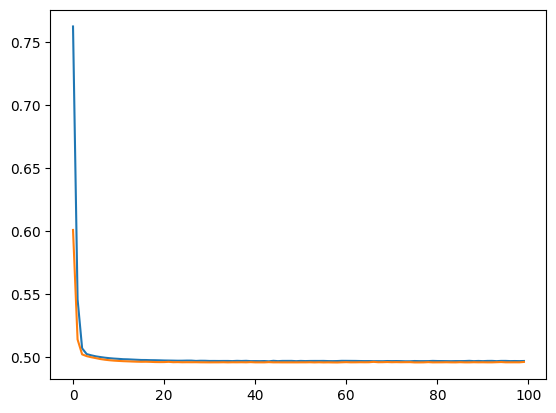

In [59]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

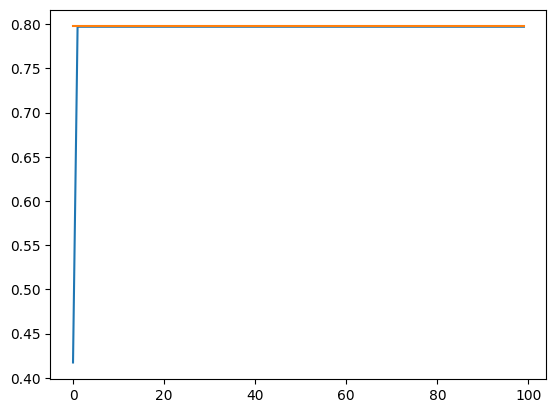

In [60]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])